In [2]:
import numpy as np 
import cv2 as cv
import cv2 as cv2
import matplotlib.pyplot as plt 

In [3]:
# read original image 
image = cv2.imread("/Users/danieljoshua/Downloads/Aufnahme-161029-0017.png") 

# convet to gray scale image 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
cv2.imwrite('gray.png', gray) 

# apply median filter for smoothning 
blurM = cv2.medianBlur(gray, 5) 
cv2.imwrite('blurM.png', blurM) 

# apply gaussian filter for smoothning 
blurG = cv2.GaussianBlur(gray, (9, 9), 0) 
cv2.imwrite('blurG.png', blurG) 

# histogram equalization 
histoNorm = cv2.equalizeHist(gray) 
cv2.imwrite('histoNorm.png', histoNorm) 

# create a CLAHE object for 
# Contrast Limited Adaptive Histogram Equalization (CLAHE) 
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8)) 
claheNorm = clahe.apply(gray) 
cv2.imwrite('claheNorm.png', claheNorm) 


# contrast stretching 
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
	if (0 <= pix and pix <= r1): 
		return (s1 / r1) * pix 
	elif (r1 < pix and pix <= r2): 
		return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1 
	else: 
		return ((255 - s2) / (255 - r2)) * (pix - r2) + s2 

	# Define parameters. 


r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 

# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2) 
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2) 

cv2.imwrite('contrast_stretch.png', contrast_stretched) 
cv2.imwrite('contrast_stretch_blurM.png', 
			contrast_stretched_blurM) 

# edge detection using canny edge detector 
edge = cv2.Canny(gray, 100, 200) 
cv2.imwrite('edge.png', edge) 

edgeG = cv2.Canny(blurG, 100, 200) 
cv2.imwrite('edgeG.png', edgeG) 

edgeM = cv2.Canny(blurM, 100, 200) 
cv2.imwrite('edgeM.png', edgeM) 

True

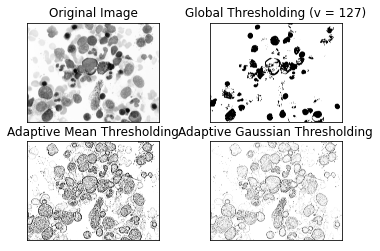

In [4]:
img = cv.imread('/Users/danieljoshua/Downloads/Aufnahme-161029-0017.png',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
ret4, th4 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 

In [6]:
Cell_count, x_count, y_count = [], [], [] 

In [ ]:
img = cv.imread('/Users/danieljoshua/Downloads/Aufnahme-161029-0017.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=13,param2=2,minRadius=1,maxRadius=200)

if circles is not None: 

    circles = np.round(circles[0, :]).astype("int")

for (x, y, r) in circles:
    cv2.circle(img, (x, y), r, (0, 255, 0), 2)
    cv2.rectangle(img, (x - 2, y - 2),(x + 2, y + 2),(0, 128, 255),-1)
    Cell_count.append(r)
    x_count.append(x)
    y_count.append(y)

cv.imshow("gray", img) 
cv.waitKey(0)

print(len(Cell_count)) 